<a href="https://colab.research.google.com/github/Fredo54/CAP4630/blob/master/HW_2/hw2_prob2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prob 2

In [0]:
import numpy as np
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [0]:
# generate m random pairs (x, y)
m = 100
# Added weight here?
X = 2 * np.random.rand(m, 1)
X_2 = 6 * np.random.rand(m, 1)



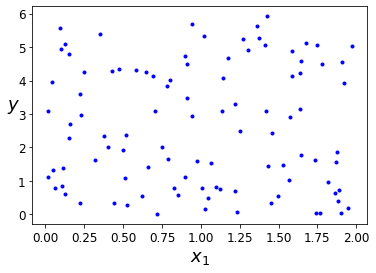

In [267]:
plt.plot(X, X_2, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

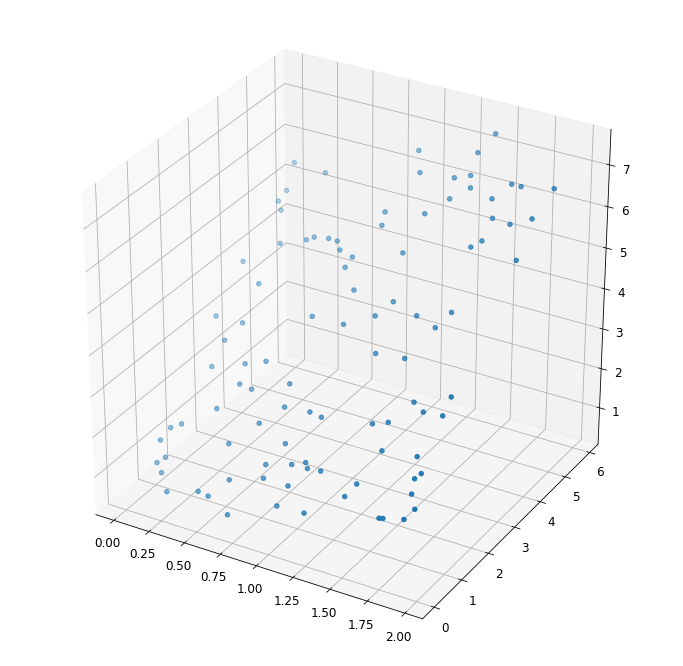

In [268]:
y = X + X_2
fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')
ax.scatter(X, X_2, y)


In [269]:
X_b = np.column_stack([np.ones((m, 1)), X, X_2])
print(X_b.shape)
# show the first 5 rows
print(X_b[:5, :])

(100, 3)
[[1.         0.85371666 0.58187258]
 [1.         0.22230176 0.33424102]
 [1.         0.06083176 0.7753428 ]
 [1.         1.45375381 0.34644648]
 [1.         1.74802734 5.07007342]]


In [270]:
# create array with x1=0 and x1=2 and x2=5
X_new = np.array([[0], [2], [5]])
# add x0 = 1, x1 = 5 to each instance
X_new_b = np.column_stack([np.ones((3, 1)), X_new])
print(X_new_b)

[[1. 0.]
 [1. 2.]
 [1. 5.]]


In [0]:
# number of epochs
epochs = 20
# learning rate
lr = 0.01
# fix initial random weight for gradient descent (batch gradient descent)
np.random.seed(42)
initial_weight = np.random.randn(3, 1) 

In [272]:
# sanity check (I will use this to explain how the vectorized code works)
print(initial_weight.shape)
print(y.shape)
print((X_b.dot(initial_weight)).shape)
print((X_b.T.dot(X_b.dot(initial_weight))).shape)

(3, 1)
(100, 1)
(100, 1)
(3, 1)


In [0]:
weight = initial_weight
weight_path_mgd = []
batch_size = 4

weight_path_mgd.append(weight)
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, batch_size):
        xi = X_b_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        gradient = 1 / batch_size * xi.T.dot(xi.dot(weight) - yi)
        weight = weight - lr * gradient
        weight_path_mgd.append(weight)

In [274]:
weight_path_mgd[-1]

array([[0.45437653],
       [0.72755587],
       [0.95210385]])

In [0]:
weight_path_mgd = np.array(weight_path_mgd)

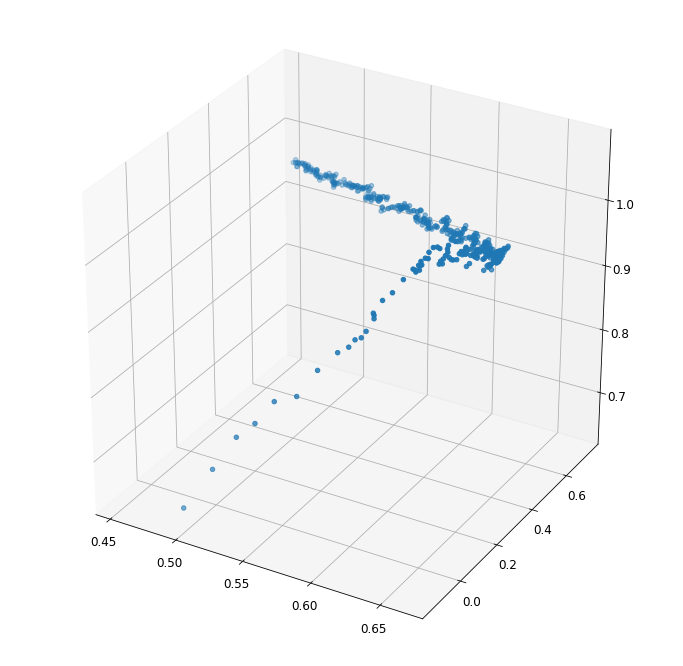

In [276]:
plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')
ax.scatter(weight_path_mgd[:, 0], weight_path_mgd[:, 1], weight_path_mgd[:, 2], 'g-s')


In [0]:
X_new = np.array([[8], [4], [2]])
X_new_b = np.column_stack([np.ones((3,1)), X_new])

m = 100
X_1 = 3 * np.random.rand(m,1)
X_2 = 6 * np.random.rand(m,1)
y = X_1 + X_2

X = np.column_stack([np.ones((m,1)), X_1, X_2])

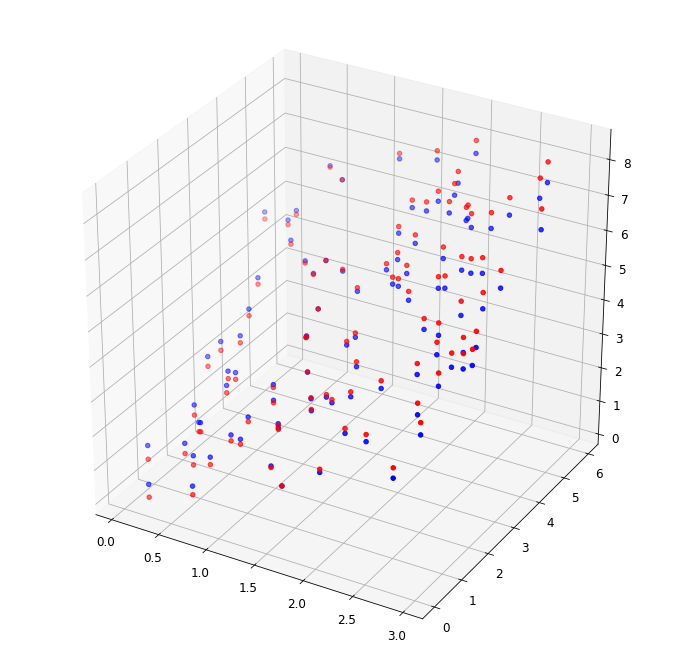

In [278]:
y_new = X.dot(weight)

fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')
ax.scatter(X_1, X_2, y, c='red')
ax.scatter(X_1, X_2, y_new, c='blue')

ax.plot_surface(X_1, X_2, y_new)